# Random forests algorithm
Random forests is a supervised learning algorithm. It can be used both for classification and regression. 
It is also the most flexible and easy to use algorithm. A forest is comprised of trees. It is said that the more 
trees it has, the more robust a forest is. Random forests creates decision trees on randomly selected data samples, 
gets prediction from each tree and selects the best solution by means of voting. It also provides a pretty good indicator 
of the feature importance.

It works in four steps:

* Select random samples from a given dataset.
* Construct a decision tree for each sample and get a prediction result from each decision tree.
* Perform a vote for each predicted result.
* Select the prediction result with the most votes as the final prediction.
................................................
## Advantages: 
 * Random forests is considered as a highly accurate and robust method because of the number of decision trees participating in the process.
 * It does not suffer from the overfitting problem. The main reason is that it takes the average of all the predictions, which cancels out the biases.
 * The algorithm can be used in both classification and regression problems.
 * Random forests can also handle missing values.(There are two ways to handle these:using median values to  replace continuous variables, and computing the proximity-weighted average of missing values.) 
 * we can get the relative feature importance, which helps in selecting the most contributing features for the classifier.
 ## Disadvantages:
 * Random forests is slow in generating predictions because it has multiple decision trees. Whenever it makes a prediction, all the trees in the forest have to make a prediction for the same given input and then perform voting on it. This whole process is time-consuming.
 * The model is difficult to interpret compared to a decision tree, where you can easily make a decision by following the path in the tree
...............................................


In [3]:
#importing libraries
import os
import pandas as pd
import numpy as np

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#making new folder in the drive
!mkdir '/content/drive/My Drive/Earthquake_damage'

mkdir: cannot create directory ‘/content/drive/My Drive/Earthquake_damage’: File exists


In [0]:
#if any data is zip file we want to unzip that for future purpose
!unzip '/content/drive/My Drive/Earthquake_damage.zip' -d '/content/drive/My Drive/Earthquake_damage'

open the dataset files and list the directories available in that dataset file

In [0]:

path="/content/drive/My Drive/Earthquake_damage/Earthquake_damage"
print(os.listdir(path))

['Building_Ownership_Use.csv', 'ReadMe.md', 'test.csv', 'sample_submission.csv', 'train.csv', 'Building_Structure.csv']


In [2]:
path="C:\\Users\\best\\Downloads\\Earthquake_damage\\Earthquake_damage"
print(os.listdir(path))

['Building_Ownership_Use.csv', 'Building_Structure.csv', 'ReadMe.md', 'sample_submission.csv', 'test.csv', 'train.csv']


In [3]:
#open the csv file ,and drop the district_id and vdcmun_id from the dataset
data1=pd.read_csv(path+'/train.csv')      
data1.head()
#data1=training[:10000]


,area_assesed,building_id,damage_grade,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,24385bfd2a2,Grade 4,24,0.0,0,0,0,0,0,0,0,0.0,2489
1,Both,405d1bbebbf,Grade 2,44,0.0,0,0,0,0,0,0,0,1.0,4423
2,Both,351d9bc71f6,Grade 1,36,0.0,0,0,0,0,0,0,0,0.0,3650
3,Building removed,2be3a971166,Grade 5,30,0.0,0,0,0,0,0,0,0,0.0,3016
4,Both,34c7d073ea6,Grade 3,36,0.0,0,0,0,0,0,0,0,0.0,3627


we try to reduce the features using decoding method.we take the result in the different type of risk and store that in a same cell join that result in the different cell and store in the single cell

In [4]:

data1["has_geotechnical_risk"]=data1.iloc[:,4:12].astype(str).agg('-'.join,axis=1)
data1.drop(['district_id','vdcmun_id'],axis=1,inplace=True)

In [5]:
data1.head()

,area_assesed,building_id,damage_grade,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,Both,24385bfd2a2,Grade 4,0.0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0.0
1,Both,405d1bbebbf,Grade 2,0.0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,1.0
2,Both,351d9bc71f6,Grade 1,0.0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0.0
3,Building removed,2be3a971166,Grade 5,0.0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0.0
4,Both,34c7d073ea6,Grade 3,0.0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0.0


In [6]:
data1.drop(data1.columns[4:11],axis=1,inplace=True)

In [7]:
data1.head()

,area_assesed,building_id,damage_grade,has_geotechnical_risk,has_repair_started
0,Both,24385bfd2a2,Grade 4,0.0-0-0-0-0-0-0-0,0.0
1,Both,405d1bbebbf,Grade 2,0.0-0-0-0-0-0-0-0,1.0
2,Both,351d9bc71f6,Grade 1,0.0-0-0-0-0-0-0-0,0.0
3,Building removed,2be3a971166,Grade 5,0.0-0-0-0-0-0-0-0,0.0
4,Both,34c7d073ea6,Grade 3,0.0-0-0-0-0-0-0-0,0.0


In [9]:
data2=pd.read_csv(path+'/Building_Ownership_Use.csv')
data2.head()


,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,a3380c4f75,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,a3380c4fd9,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,a3380c503e,7,701,70102,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,a338a4e5f2,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,a338a4e653,7,701,70103,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


we try to reduce the features using decoding method.we take the result in the different type of users and store that in a same cell join that result in the different cell and store in the single cell

In [10]:
data2["has_secondary_use"]=data2.iloc[:,6:].astype(str).agg('-'.join,axis=1)
data2.drop(['district_id','vdcmun_id'],axis=1,inplace=True)

In [11]:
data2.head()

,building_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,a3380c4f75,70102,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0,0,0
1,a3380c4fd9,70102,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0,0,0
2,a3380c503e,70102,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0,0,0
3,a338a4e5f2,70103,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0,0,0
4,a338a4e653,70103,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,0,0,0,0,0,0,0,0,0,0


In [12]:
data2.drop(data2.columns[5:],axis=1,inplace=True)

In [13]:
data2.head()

,building_id,ward_id,legal_ownership_status,count_families,has_secondary_use
0,a3380c4f75,70102,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0
1,a3380c4fd9,70102,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0
2,a3380c503e,70102,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0
3,a338a4e5f2,70103,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0
4,a338a4e653,70103,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0


In [18]:
#we have different csv file so that we want compain all table together .there merge the data tables based building_id
data3 = pd.merge(data2,data1,on=['building_id'])

In [19]:
data4=pd.read_csv(path+'/Building_Structure.csv')
data4.head()
data4.drop(['district_id','vdcmun_id','ward_id'],axis=1,inplace=True)

In [20]:
data= pd.merge(data4,data3,on=['building_id'])

In [21]:
data.head()

,building_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,...,has_superstructure_other,condition_post_eq,ward_id,legal_ownership_status,count_families,has_secondary_use,area_assesed,damage_grade,has_geotechnical_risk,has_repair_started
0,a3380c4fd9,1,1,32,324,9,9,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,...,1,Damaged-Repaired and used,70102,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,Grade 2,0.0-0-0-0-0-0-0-0,1.0
1,a3380c503e,2,2,34,456,18,18,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,...,1,Damaged-Repaired and used,70102,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,Grade 3,0.0-0-0-0-0-0-0-0,1.0
2,a338a4e5f2,2,2,20,452,18,18,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,...,1,Damaged-Repaired and used,70103,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,Grade 3,0.0-0-0-0-0-0-0-0,1.0
3,a338a4e71f,1,1,44,546,9,9,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,...,0,Damaged-Not used,70103,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,Grade 4,0.0-0-0-0-0-0-0-0,1.0
4,a339d612f3,1,1,25,324,9,9,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,...,1,Damaged-Not used,70105,Private,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,Grade 3,0.0-0-0-0-0-0-0-0,1.0


In [22]:
data.drop(['legal_ownership_status','building_id'],axis=1,inplace=True)

In [23]:
#correlation method is used to find the relationship between the features.that range -1 to 1.if corelaton value near to -1 and 1 that features
# have relationship each other but that value become 0 there is no relation ship
relation=data.corr(method ='pearson')

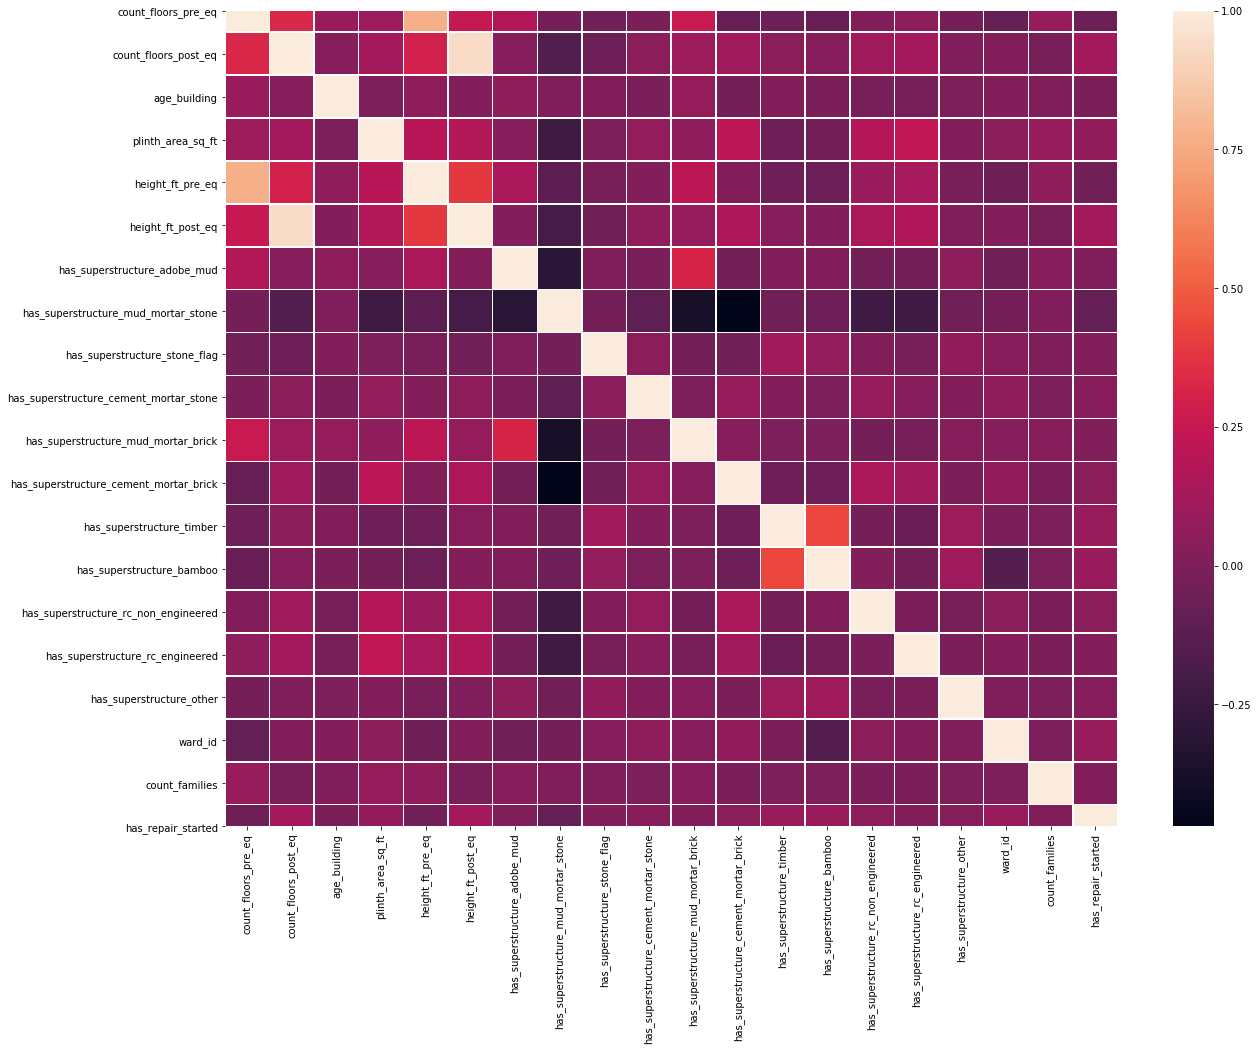

In [24]:

# importing the required module 
import matplotlib.pyplot as plt
import seaborn as sbn
plt.subplots(figsize=(20,15))
a=sbn.heatmap(relation,linewidth=0.5)

In [25]:
#based on the correlation removing the related features from the dataset
data.drop(['count_floors_pre_eq'],axis=1,inplace=True)

In [26]:
data.head()

,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,ward_id,count_families,has_secondary_use,area_assesed,damage_grade,has_geotechnical_risk,has_repair_started
0,1,32,324,9,9,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,...,0,1,Damaged-Repaired and used,70102,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,Grade 2,0.0-0-0-0-0-0-0-0,1.0
1,2,34,456,18,18,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,...,0,1,Damaged-Repaired and used,70102,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,Grade 3,0.0-0-0-0-0-0-0-0,1.0
2,2,20,452,18,18,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,...,0,1,Damaged-Repaired and used,70103,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,Grade 3,0.0-0-0-0-0-0-0-0,1.0
3,1,44,546,9,9,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,...,0,0,Damaged-Not used,70103,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,Grade 4,0.0-0-0-0-0-0-0-0,1.0
4,1,25,324,9,9,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,...,0,1,Damaged-Not used,70105,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,Grade 3,0.0-0-0-0-0-0-0-0,1.0


    info()used to know the columns and their corresponding data types,along with finding whether they contain null values or not.
    In this dataset has_repair_started and count_families we can find null values.


In [27]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 631761 entries, 0 to 631760
Data columns (total 31 columns):
count_floors_post_eq                      631761 non-null int64
age_building                              631761 non-null int64
plinth_area_sq_ft                         631761 non-null int64
height_ft_pre_eq                          631761 non-null int64
height_ft_post_eq                         631761 non-null int64
land_surface_condition                    631761 non-null object
foundation_type                           631761 non-null object
roof_type                                 631761 non-null object
ground_floor_type                         631761 non-null object
other_floor_type                          631761 non-null object
position                                  631761 non-null object
plan_configuration                        631761 non-null object
has_superstructure_adobe_mud              631761 non-null int64
has_superstructure_mud_mortar_stone       631761 n

The describe() function in pandas is very handy in getting various summary statistics.This function returns the count, mean, standard deviation, minimum and maximum values and the quantiles of the data.

In [28]:
outlir=data.describe()
outlir

,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,ward_id,count_families,has_repair_started
count,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631761.000000,631760.000000,598344.000000
mean,1.335641,27.805518,417.907500,16.308984,10.383541,0.089029,0.761429,0.034189,0.018613,0.068186,0.075619,0.253346,0.083660,0.042874,0.016079,0.014969,271224.334601,0.984075,0.316076
std,1.097094,72.942364,231.192299,5.793634,8.644051,0.284786,0.426210,0.181713,0.135154,0.252064,0.264387,0.434928,0.276877,0.202573,0.125779,0.121430,77750.671303,0.419209,0.464943
min,0.000000,0.000000,70.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70102.000000,0.000000,0.000000
25%,0.000000,10.000000,284.000000,13.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,224201.000000,1.000000,0.000000
50%,2.000000,18.000000,364.000000,16.000000,12.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,270301.000000,1.000000,0.000000
75%,2.000000,30.000000,493.000000,19.000000,16.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,311901.000000,1.000000,1.000000
max,9.000000,999.000000,5220.000000,99.000000,206.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,514209.000000,11.000000,1.000000


In [29]:
''''outlier_data=outlir.loc["max"]
outlier_data'''

'\'outlier_data=outlir.loc["max"]\noutlier_data'

value_counts()tells us vote count of each quality score of column values in descending order.There show the grade values count

In [30]:
data.damage_grade.value_counts()

Grade 5    210825
Grade 4    152244
Grade 3    122288
Grade 2     85084
Grade 1     61320
Name: damage_grade, dtype: int64

total number of null/missing values in the each column

In [31]:
data.isnull().sum()

count_floors_post_eq                          0
age_building                                  0
plinth_area_sq_ft                             0
height_ft_pre_eq                              0
height_ft_post_eq                             0
land_surface_condition                        0
foundation_type                               0
roof_type                                     0
ground_floor_type                             0
other_floor_type                              0
position                                      0
plan_configuration                            0
has_superstructure_adobe_mud                  0
has_superstructure_mud_mortar_stone           0
has_superstructure_stone_flag                 0
has_superstructure_cement_mortar_stone        0
has_superstructure_mud_mortar_brick           0
has_superstructure_cement_mortar_brick        0
has_superstructure_timber                     0
has_superstructure_bamboo                     0
has_superstructure_rc_non_engineered    

    display heatmap based on the presents of null value.actuly it display violet background ,if any null value present it show colour changes
    In this dataset has_repair_started we can find the colour differents that means there null values is present

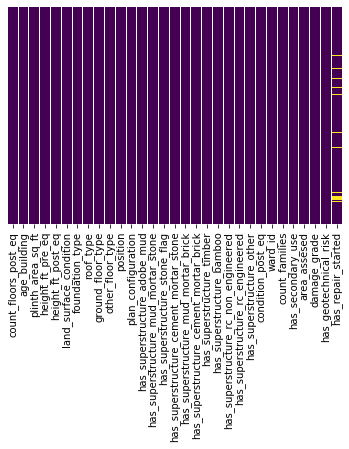

In [32]:
import seaborn as sns
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

In [33]:
data.dtypes

count_floors_post_eq                        int64
age_building                                int64
plinth_area_sq_ft                           int64
height_ft_pre_eq                            int64
height_ft_post_eq                           int64
land_surface_condition                     object
foundation_type                            object
roof_type                                  object
ground_floor_type                          object
other_floor_type                           object
position                                   object
plan_configuration                         object
has_superstructure_adobe_mud                int64
has_superstructure_mud_mortar_stone         int64
has_superstructure_stone_flag               int64
has_superstructure_cement_mortar_stone      int64
has_superstructure_mud_mortar_brick         int64
has_superstructure_cement_mortar_brick      int64
has_superstructure_timber                   int64
has_superstructure_bamboo                   int64


In [34]:
data.count_families.value_counts()

1.0     547837
0.0      50659
2.0      27771
3.0       4185
4.0        939
5.0        262
6.0         73
7.0         19
8.0          9
9.0          5
11.0         1
Name: count_families, dtype: int64

plot the box plot by using dataset variables.object  type data we can't directly plot by using box plot that's why we apply labelencoding.total variables we don't want to plot,which are  not required that variable listed in the one array.compair this array value with main dataset varible .If it is same don't want to plot. 

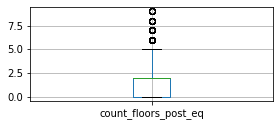

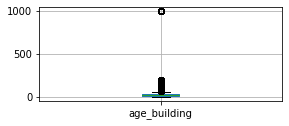

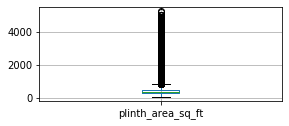

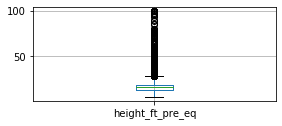

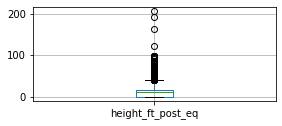

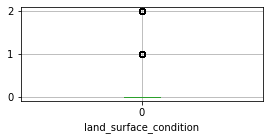

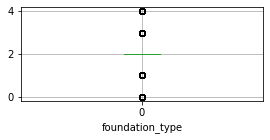

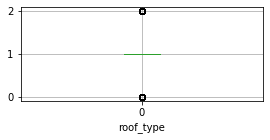

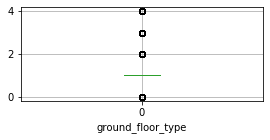

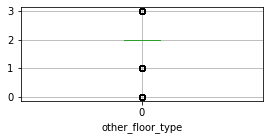

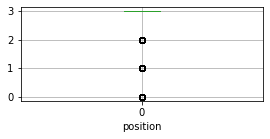

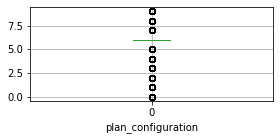

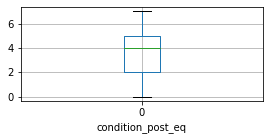

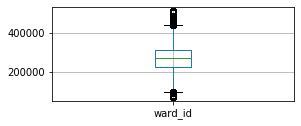

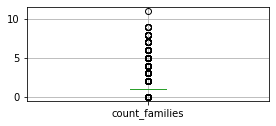

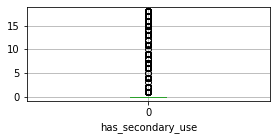

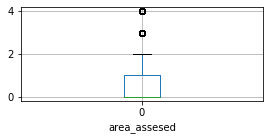

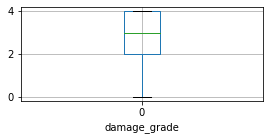

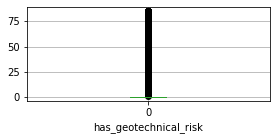

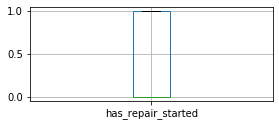

In [36]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
i=1
le = LabelEncoder()
avoid_data=['has_superstructure_adobe_mud','has_superstructure_mud_mortar_stone','has_superstructure_stone_flag',               
             'has_superstructure_cement_mortar_stone','has_superstructure_mud_mortar_brick','has_superstructure_cement_mortar_brick',
              'has_superstructure_timber','has_superstructure_bamboo','has_superstructure_rc_non_engineered',
              'has_superstructure_rc_engineered','has_superstructure_other']
for col in data.columns:
    if col not in avoid_data:
        if data[col].dtypes==object:
            val=pd.DataFrame(le.fit_transform(data[col]))
            plt.figure(figsize=(20,10))
            plt.subplot(5,4,i)
            i=i+1
            val.boxplot()
            plt.xlabel(col)
        else:
            plt.figure(figsize=(20,10))
            plt.subplot(5,4,i)
            i=i+1
            data.boxplot(col)
            #plt.xlabel(col)

box ploting of individual dataset variable 

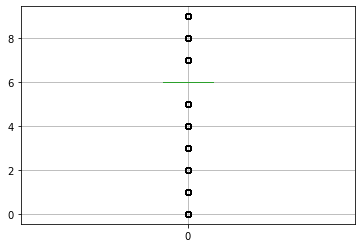

In [37]:
val=pd.DataFrame(le.fit_transform(data['plan_configuration']))

val.boxplot()


 
plot the scatter plot based on the  two variable in the dataset.

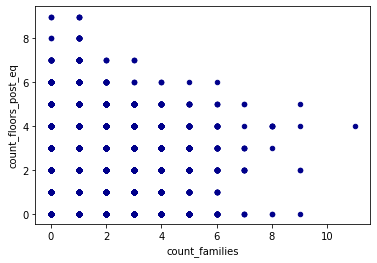

In [38]:
sctpt=data.plot.scatter(x='count_families',
                      y='count_floors_post_eq',
                      c='DarkBlue')

In [102]:
data.damage_grade.value_counts()

Grade 5    209933
Grade 4    151562
Grade 3    121600
Grade 2     84494
Grade 1     60871
Name: damage_grade, dtype: int64

In the dataset age_building contain value 999, this value contain data placed far from the box plot.so it consider as the outlier. we can remove that points but that decision should take after analizing  real life situvation.In this part  listing the all  data from the dataset contain building age 999

In [43]:
data_indx=data[data['age_building']==999].index.tolist() 
data_indx

[2428,
 3219,
 3549,
 3550,
 3551,
 3554,
 3586,
 3587,
 3589,
 3597,
 3598,
 3600,
 3601,
 3603,
 3609,
 3610,
 3612,
 3614,
 3615,
 3616,
 3618,
 3619,
 3620,
 3621,
 3622,
 3623,
 3624,
 3625,
 3626,
 3627,
 3628,
 3629,
 3630,
 3631,
 3632,
 3634,
 3635,
 3638,
 3639,
 3641,
 3642,
 3644,
 3647,
 3648,
 3651,
 3652,
 3653,
 3654,
 3656,
 3657,
 3658,
 3659,
 3660,
 3661,
 3662,
 3791,
 3793,
 3794,
 3795,
 3796,
 3797,
 3798,
 3799,
 3800,
 3801,
 3802,
 3803,
 3804,
 3805,
 3806,
 3807,
 3809,
 4643,
 4649,
 4651,
 4659,
 4665,
 4666,
 4672,
 4686,
 4687,
 4694,
 4696,
 4702,
 4705,
 4713,
 4715,
 4717,
 4719,
 4722,
 4723,
 4724,
 4726,
 4728,
 4730,
 4734,
 4735,
 4736,
 4737,
 4738,
 4741,
 4742,
 4743,
 4745,
 4747,
 4751,
 4753,
 4754,
 4760,
 4764,
 4765,
 4839,
 4844,
 4849,
 4850,
 4851,
 4861,
 4863,
 4868,
 4869,
 4885,
 4886,
 4890,
 4891,
 4892,
 4893,
 4896,
 4901,
 4905,
 4908,
 4909,
 4912,
 4914,
 4915,
 4919,
 4921,
 4922,
 4926,
 4927,
 4929,
 4931,
 4948,
 4954,

remove data from dataset based on the building age is 999

In [44]:
data = data.loc[~((data['age_building']==999))]

checking any data present in the dataset with buliding age is 999

In [45]:
print(data[data.age_building == 999].shape[0])

0


  
    if data type of the data in the datset is object then we can't plot the distribution plot so that it plot after finishing encoding.other datatype data is directly ploted.

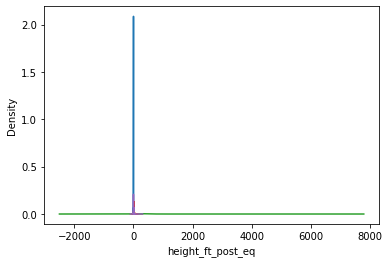

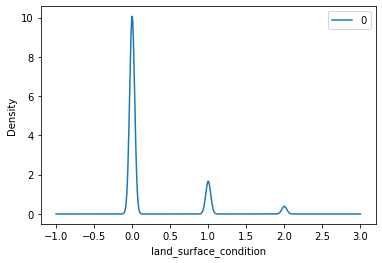

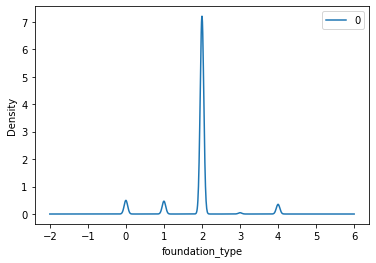

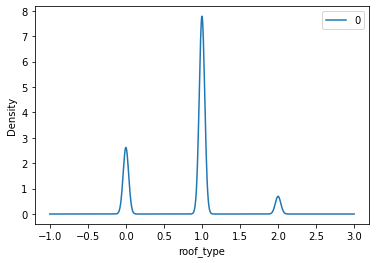

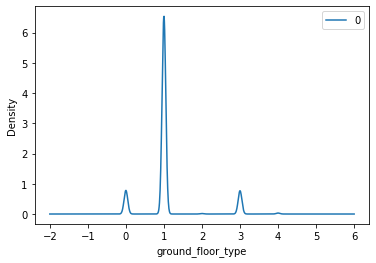

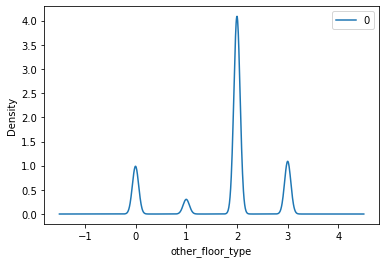

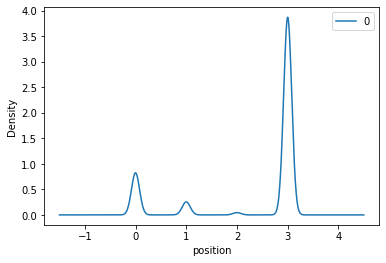

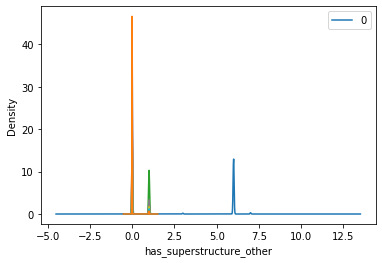

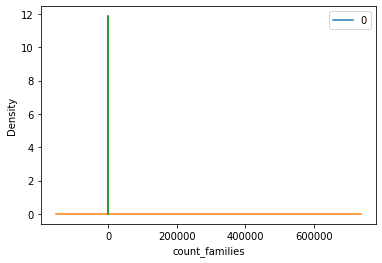

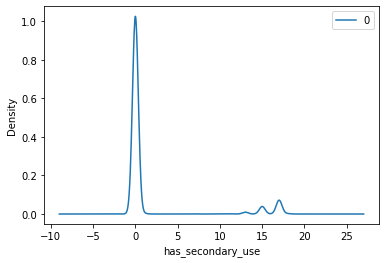

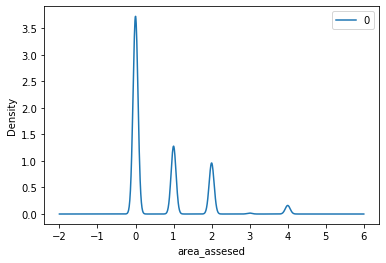

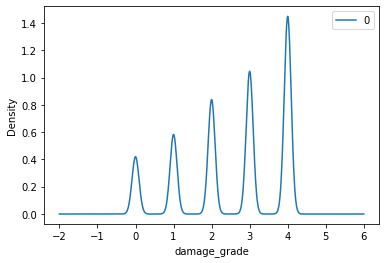

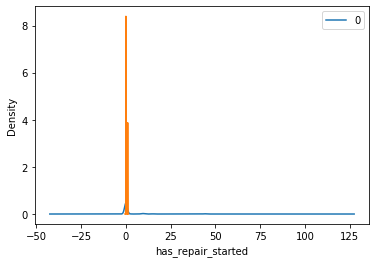

In [51]:
for col in data.columns:
    if data[col].dtypes==object:
        val=pd.DataFrame(le.fit_transform(data[col]))
        ax=val.plot.kde()
        plt.xlabel(col)
    else:
        ax=data[col].plot.kde()
        plt.xlabel(col)

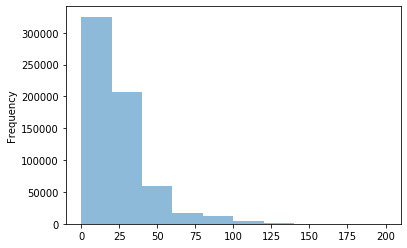

In [45]:
ax = data['age_building'].plot.hist(bins=10, alpha=0.5)

In [96]:
df1 = data[['area_assesed']]
df1.area_assesed.value_counts()

Both                   380951
Building removed       130813
Exterior                98384
Not able to inspect     16504
Interior                 1808
Name: area_assesed, dtype: int64

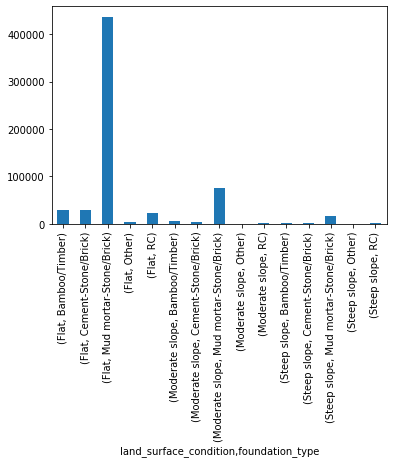

In [111]:
slice = data[['land_surface_condition',
'foundation_type']]
slice.groupby(['land_surface_condition',
'foundation_type']).size().plot.bar()



In this part we plot the bar graph grade and other selected dataset variable.There create a new dataset it contain grade and selected variable .after consider that variable create a group and find the size by using that bar plot is constructed

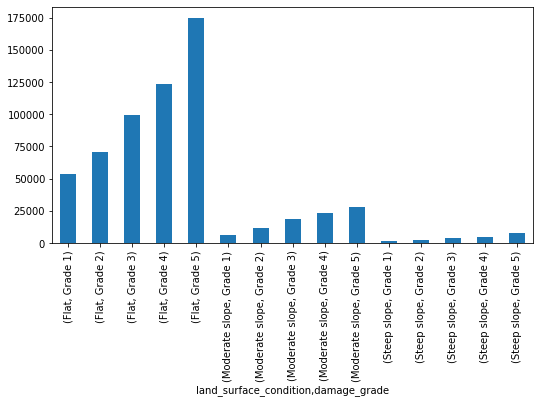

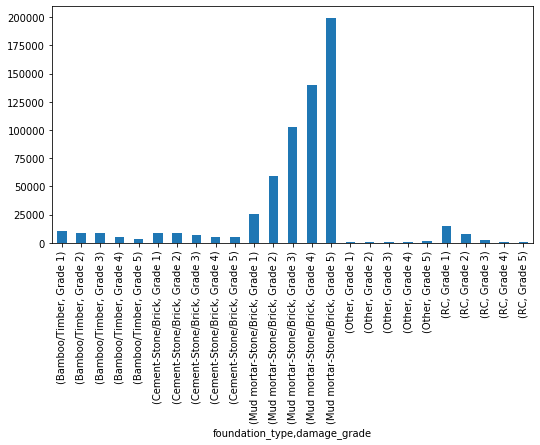

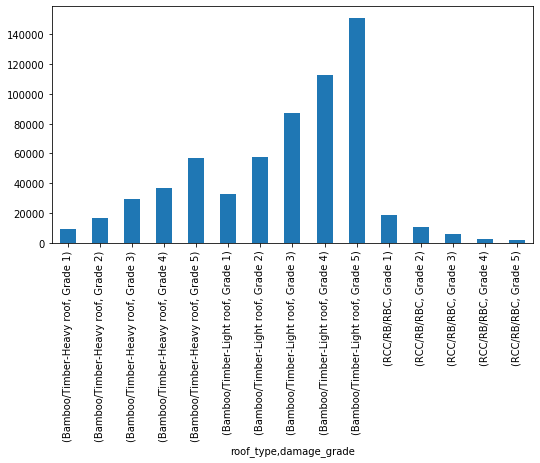

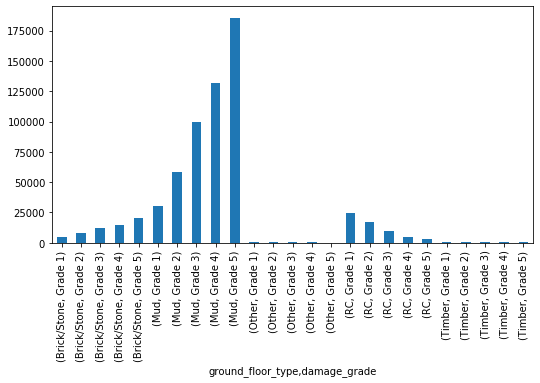

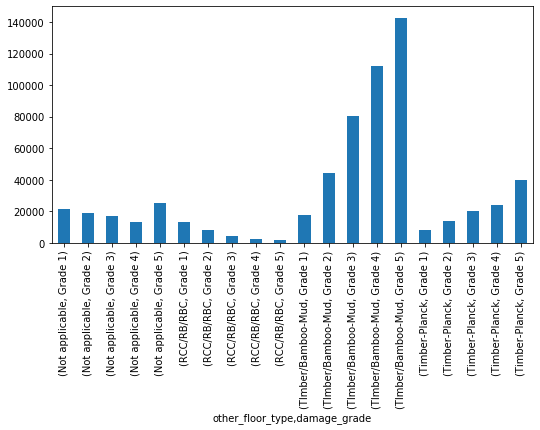

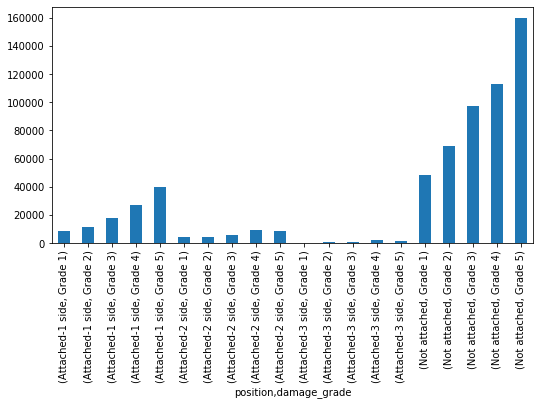

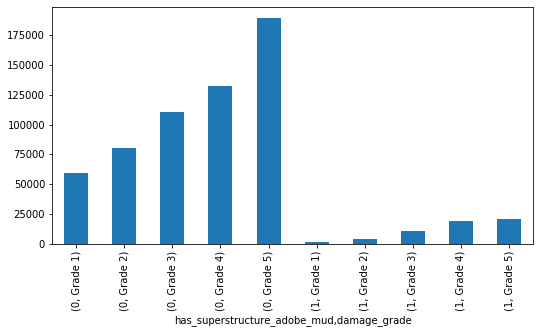

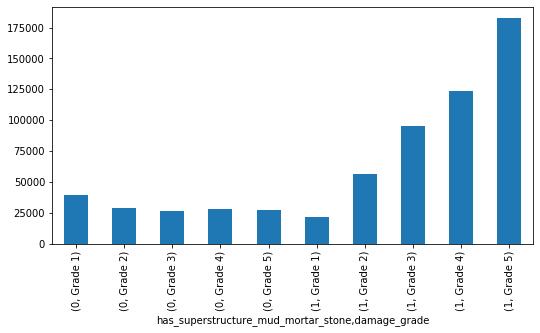

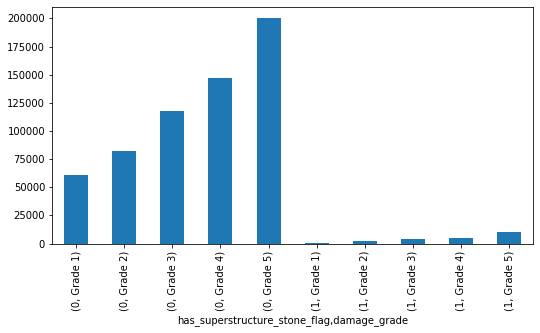

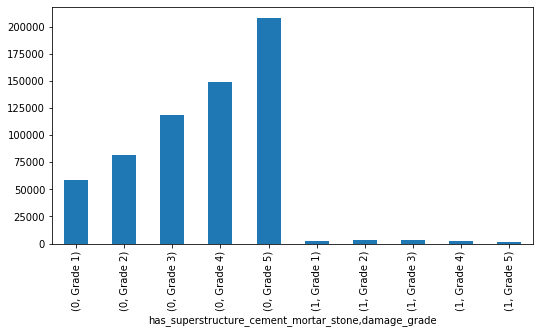

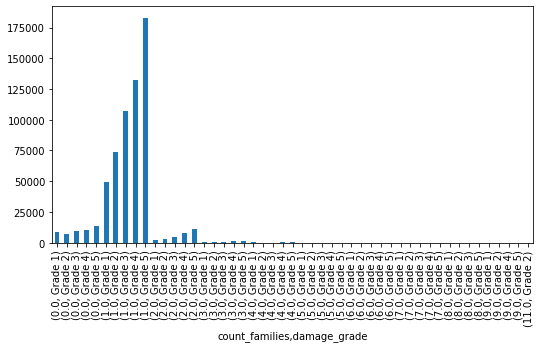

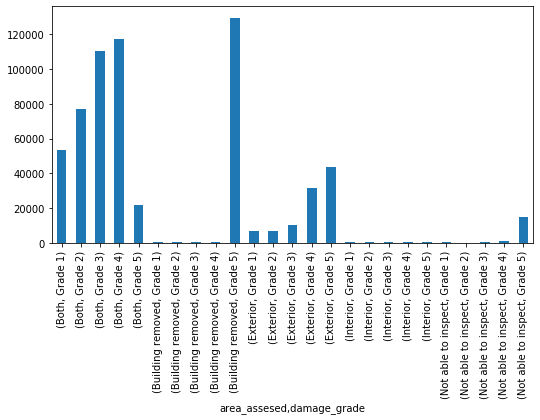

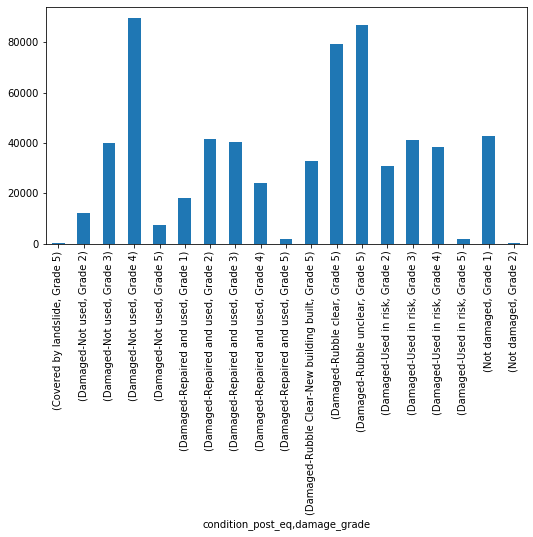

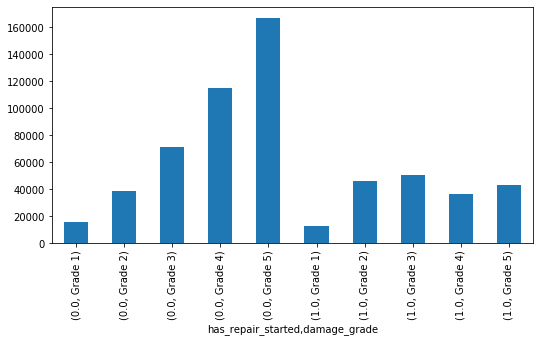

In [101]:
#import plotly.express as px
columns=['land_surface_condition',
       'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type',
       'position','has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone','count_families','area_assesed','condition_post_eq',
       'has_repair_started']
i=1
for col in columns:
    slice = data[['damage_grade',col]]
    a=slice.groupby([col,'damage_grade']).size()
    plt.figure(figsize=(50,20))
    plt.subplot(4,5,i)
    i=i+1
    a.plot.bar()

    

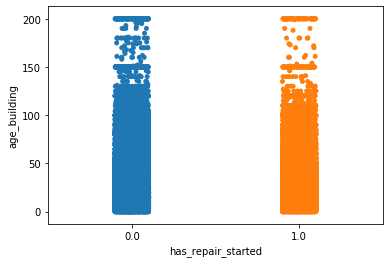

In [112]:
sns.stripplot(x="has_repair_started", y="age_building", data=data)

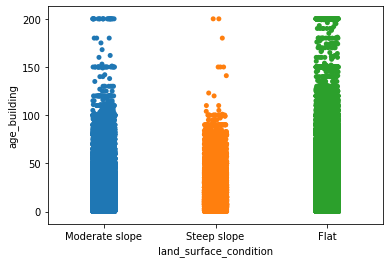

In [113]:
sns.stripplot(x="land_surface_condition", y="age_building", data=data)

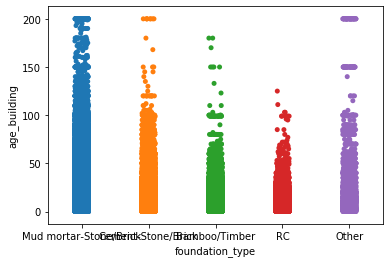

In [114]:
sns.stripplot(x="foundation_type", y="age_building", data=data)

     *from this data visualization we can conclude that the building material and land surface also very closely related with grade.
     *when the building surface is flat and building foundation is done with mudmortar-storn/brick then age of the building increases.  
     *the building repairing will not happening when building age will increses .
     *when building repairing not happen then grade count increases grade1 to grade 5 

In [115]:

train_label=data['damage_grade']
data.drop('damage_grade',axis=1,inplace=True)

In [116]:
from sklearn.model_selection import train_test_split
train, test,train_labl, test_labl = train_test_split(data, train_label, test_size = 0.2,train_size=0.8)

In [117]:
#list the what are the featuers consider for training
features=list(train)
print(features)

['count_floors_post_eq', 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'condition_post_eq', 'ward_id', 'count_families', 'has_secondary_use', 'area_assesed', 'has_geotechnical_risk', 'has_repair_started']


In [118]:
feature_test=list(test)

In [119]:
#there we apply encoding  the data using LabelEncoding,how mony classes are there based on the label is giving
from sklearn.preprocessing import LabelEncoder
# Instatniate LabelEncoder
le = LabelEncoder()
for feature in features:
  # LabelEncode damage_grade of data
  train[feature] = le.fit_transform(train[feature])
  # Inspecting encoded data
  data.head()

C:\Users\best\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [120]:
#there we apply encoding  the data using LabelEncoding,how mony classes are there based on the label is giving
for ftr in feature_test:
  # LabelEncode damage_grade of data
  test[ftr] = le.fit_transform(test[ftr])
  # Inspecting encoded data
  data.head()

C:\Users\best\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [121]:
train.head()

,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,ward_id,count_families,has_secondary_use,area_assesed,has_geotechnical_risk,has_repair_started
268132,2,25,248,10,11,0,2,1,1,2,...,0,0,0,1,3271,1,0,2,0,0
475958,0,3,428,6,0,1,2,1,1,3,...,0,0,0,3,6636,1,0,1,0,1
365805,5,25,268,39,40,0,4,2,3,1,...,0,0,0,7,4572,1,13,0,0,7162
288618,0,10,248,6,0,1,2,1,1,0,...,0,0,0,5,3546,0,0,1,0,0
541074,1,10,528,3,4,0,1,1,1,0,...,0,0,0,7,7189,1,0,0,0,7163


apply the onehotencoding method ,this method produces a vector with length equal to the number of categories in the data set.  If a data point belongs to the ith category then components of this vector are assigned the value 0 except for the ith component, which is assigned a value of 1.  In this way one can keep track of the categories in a numerically meaningful way.

In [122]:
data.head()

,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,...,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,ward_id,count_families,has_secondary_use,area_assesed,has_geotechnical_risk,has_repair_started
0,1,32,324,9,9,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,...,0,0,1,Damaged-Repaired and used,70102,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,0.0-0-0-0-0-0-0-0,1.0
1,2,34,456,18,18,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,...,0,0,1,Damaged-Repaired and used,70102,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,0.0-0-0-0-0-0-0-0,1.0
2,2,20,452,18,18,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,TImber/Bamboo-Mud,...,0,0,1,Damaged-Repaired and used,70103,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,0.0-0-0-0-0-0-0-0,1.0
3,1,44,546,9,9,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,...,0,0,0,Damaged-Not used,70103,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,0.0-0-0-0-0-0-0-0,1.0
4,1,25,324,9,9,Moderate slope,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Not applicable,...,0,0,1,Damaged-Not used,70105,1.0,0.0-0-0-0-0-0-0-0-0-0-0,Both,0.0-0-0-0-0-0-0-0,1.0


we create two class with or without grade.so that in x contain dataset without grade and y contain with label.for training purpose we make this category

In [123]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)


In [124]:

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(train,train_labl)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [125]:
pred=clf.predict(test)

At this point we have trained our algorithm and made some predictions. Now we'll see how accurate our algorithm is. 
For classification tasks some commonly used metrics are confusion matrix, precision, recall, and F1 score. 
Lucky for us Scikit=-Learn's metrics library contains the classification_report and confusion_matrix methods that can be used to calculate these metrics for us:

In [126]:

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(test_labl,pred))
print(classification_report(test_labl, pred))

[[10269  1211   637    93     0]
 [  374  7662  5923  2987     9]
 [  131  4638 10373  9263    16]
 [   33  1564  5864 22753    67]
 [    6    36   193  1791 39799]]
              precision    recall  f1-score   support

     Grade 1       0.95      0.84      0.89     12210
     Grade 2       0.51      0.45      0.48     16955
     Grade 3       0.45      0.42      0.44     24421
     Grade 4       0.62      0.75      0.68     30281
     Grade 5       1.00      0.95      0.97     41825

    accuracy                           0.72    125692
   macro avg       0.70      0.68      0.69    125692
weighted avg       0.73      0.72      0.72    125692



In [127]:
result =clf.score(test, test_labl)
print("Accuracy: %.3f%%" % (result*100.0))

#est1=x_Test.sample()
# Use the forest's predict method on the test data
#predictions = clf.predict(y_Test)
# Calculate the absolute errors
#errors = abs(predictions - y_Test)
# Print out the mean absolute error (mae)
#print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Accuracy: 72.285%


In [128]:
test_data=pd.read_csv(path+'/test.csv') 

In [129]:
test_data.head()

,area_assesed,building_id,district_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started,vdcmun_id
0,Both,a3380c4f75,7,0.0,0,0,0,0,0,0,0,1.0,701
1,Both,a338a4e653,7,0.0,0,0,0,0,0,0,0,1.0,701
2,Building removed,a338a4e6b7,7,0.0,0,0,0,0,0,0,0,1.0,701
3,Both,a33a6eaa3a,7,0.0,0,0,0,0,0,0,0,1.0,701
4,Building removed,a33b073ff6,7,0.0,0,0,0,0,0,0,0,1.0,701


In [130]:
test_data["has_geotechnical_risk"]=test_data.iloc[:,4:12].astype(str).agg('-'.join,axis=1)
test_data.drop(['district_id','vdcmun_id'],axis=1,inplace=True)

In [131]:
test_data.head()

,area_assesed,building_id,has_geotechnical_risk,has_geotechnical_risk_fault_crack,has_geotechnical_risk_flood,has_geotechnical_risk_land_settlement,has_geotechnical_risk_landslide,has_geotechnical_risk_liquefaction,has_geotechnical_risk_other,has_geotechnical_risk_rock_fall,has_repair_started
0,Both,a3380c4f75,0-0-0-0-0-0-0-1.0,0,0,0,0,0,0,0,1.0
1,Both,a338a4e653,0-0-0-0-0-0-0-1.0,0,0,0,0,0,0,0,1.0
2,Building removed,a338a4e6b7,0-0-0-0-0-0-0-1.0,0,0,0,0,0,0,0,1.0
3,Both,a33a6eaa3a,0-0-0-0-0-0-0-1.0,0,0,0,0,0,0,0,1.0
4,Building removed,a33b073ff6,0-0-0-0-0-0-0-1.0,0,0,0,0,0,0,0,1.0


In [132]:
test_data.drop(test_data.columns[3:10],axis=1,inplace=True)
test_data.head()

,area_assesed,building_id,has_geotechnical_risk,has_repair_started
0,Both,a3380c4f75,0-0-0-0-0-0-0-1.0,1.0
1,Both,a338a4e653,0-0-0-0-0-0-0-1.0,1.0
2,Building removed,a338a4e6b7,0-0-0-0-0-0-0-1.0,1.0
3,Both,a33a6eaa3a,0-0-0-0-0-0-0-1.0,1.0
4,Building removed,a33b073ff6,0-0-0-0-0-0-0-1.0,1.0


In [133]:
test_data=test_data.merge(data2,on='building_id')

In [134]:
test_data=test_data.merge(data4,on="building_id")
test_data.fillna(0,inplace=True)

In [135]:
test_data.drop('building_id',axis=1,inplace=True)

In [136]:
test_data.drop(['count_floors_pre_eq'],axis=1,inplace=True)

In [137]:
test_data.drop(['legal_ownership_status'],axis=1,inplace=True)

In [138]:
test_data.head()

,area_assesed,has_geotechnical_risk,has_repair_started,ward_id,count_families,has_secondary_use,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,Both,0-0-0-0-0-0-0-1.0,1.0,70102,1.0,0.0-0-0-0-0-0-0-0-0-0-0,1,28,454,9,...,0,0,0,0,1,1,0,0,1,Damaged-Repaired and used
1,Both,0-0-0-0-0-0-0-1.0,1.0,70103,1.0,0.0-0-0-0-0-0-0-0-0-0-0,0,25,542,9,...,0,0,0,0,1,1,0,0,1,Damaged-Rubble unclear
2,Building removed,0-0-0-0-0-0-0-1.0,1.0,70103,1.0,0.0-0-0-0-0-0-0-0-0-0-0,0,35,589,18,...,0,0,0,0,1,1,0,0,0,Damaged-Rubble Clear-New building built
3,Both,0-0-0-0-0-0-0-1.0,1.0,70106,1.0,0.0-0-0-0-0-0-0-0-0-0-0,2,22,468,18,...,1,0,0,0,1,1,0,0,1,Damaged-Repaired and used
4,Building removed,0-0-0-0-0-0-0-1.0,1.0,70107,1.0,0.0-0-0-0-0-0-0-0-0-0-0,0,24,426,9,...,1,0,0,0,1,1,0,0,1,Damaged-Rubble Clear-New building built


In [139]:
test_ftrs=list(test_data)
print(test_ftrs)

['area_assesed', 'has_geotechnical_risk', 'has_repair_started', 'ward_id', 'count_families', 'has_secondary_use', 'count_floors_post_eq', 'age_building', 'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq', 'land_surface_condition', 'foundation_type', 'roof_type', 'ground_floor_type', 'other_floor_type', 'position', 'plan_configuration', 'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag', 'has_superstructure_cement_mortar_stone', 'has_superstructure_mud_mortar_brick', 'has_superstructure_cement_mortar_brick', 'has_superstructure_timber', 'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered', 'has_superstructure_rc_engineered', 'has_superstructure_other', 'condition_post_eq']


In [140]:
from sklearn.preprocessing import LabelEncoder
# Instatniate LabelEncoder
test_le = LabelEncoder()
for test_ftr in test_ftrs:
  # LabelEncode damage_grade of data
  test_data[test_ftr] =test_le.fit_transform(test_data[test_ftr])
  # Inspecting encoded data
  

In [141]:
test_data.head()

,area_assesed,has_geotechnical_risk,has_repair_started,ward_id,count_families,has_secondary_use,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,...,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq
0,0,1,1,0,1,0,1,28,383,3,...,0,0,0,0,1,1,0,0,1,2
1,0,1,1,1,1,0,0,25,471,3,...,0,0,0,0,1,1,0,0,1,5
2,1,1,1,1,1,0,0,35,518,12,...,0,0,0,0,1,1,0,0,0,3
3,0,1,1,2,1,0,2,22,397,12,...,1,0,0,0,1,1,0,0,1,2
4,1,1,1,3,1,0,0,24,355,3,...,1,0,0,0,1,1,0,0,1,3


In [142]:
predictions=clf.predict(test_data)

In [143]:
predictions

array(['Grade 5', 'Grade 5', 'Grade 2', ..., 'Grade 5', 'Grade 2',
       'Grade 2'], dtype=object)

In [144]:
test=pd.read_csv(path+'/test.csv') 

In [145]:
predict=pd.DataFrame({'building_id':test['building_id'],'damage_grade':predictions})

In [146]:
predict.to_excel(r'testresult.xlsx', index = False)